### Exploring Data in Python Part 1

#### Exploring your working directory

In [ ]:
# Open a file: file
file = open('moby_dick.txt', mode='r')

# Print it
print(file.read())

# Check whether file is closed
print(file.closed)

# Close file
file.close()

# Check whether file is closed
print(file.closed())

In [ ]:
# Read and print the first 3 lines
with open('moby_dick.txt') as file:
    print(file.readline())
    print(file.readline())
    print(file.readline())

### Flat Files
* Flat files are basic text files containing records, that is, table data, without structured relationships. The file extenstion for flat files can be .csv for comma-separated values or .txt for text files, and values in flat files can be separated by delimeters other than commas.
* It is important to know whether a flat fike has a header, as it may affect data import. The text also discusses how to import flat files using numpy or pandas and provide examples of tab-delimited files containing numeric or string data.

### Importing flat files using NumPy
* This article discusses the use of NumPy,  aPython package, to import flat files as numpy arrays, which are efficient and essential for other packages like scikit-learn. It explains the use of NumPy functions like loadtxt and genfromtxt to import data, and also covers customizations that can be made, such as delimiters, skipping rows, and selecting columns.
* The article also mentions the difficulty of importing mixed datatypes and suggests using other functions to handle them.

In [ ]:
# Import package
import numpy as np

# Assign filename to variable: file
file = 'digits.csv'

# Load file as array: digits
digits = np.loadtxt(file, delimeter = ',')

# Print datatype of digits
im = digits[21, 1:]
im_sq = np.reshape(im, (28, 28))

# Plot reshaped data (matplotlib.pyplot already loaded as plt)
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show()

In [ ]:
# What if there are rows, such as a header, that you don't want to import? What if your file has a delimiter other than a comma? What if you only wish to import particular colunns?

# Import numpy as np
file = 'digits_header.txt'

# Load the data: data
data = np.loadtxt(file, delimeter='\t', skiprows=1, usecols=[0,2])

# print data
print(data)

##### Importing different datatypes

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Assign filename: file
file = 'seaslug.txt'

# Import file: data
data = np.loadtxt(file, delimiter='\t', dtype=str)

# print the first element of data
print(data[0])

['Time' 'Percent']


In [19]:
# Import data as floats and skip the first row: data_float
data_float = np.loadtxt(file, delimiter='\t', dtype=float, skiprows=1)

In [20]:
print(data_float[9])

[0.    0.357]


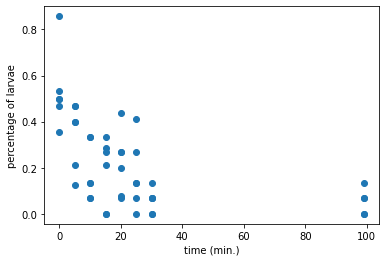

In [21]:
# Plot a scatterplot of the data
plt.scatter(data_float[:, 0], data_float[:, 1])
plt.xlabel('time (min.)')
plt.ylabel('percentage of larvae')
plt.show()

##### Working with mixed datatypes

In [23]:
# Assign a filename: file
file = 'titanic_sub.csv'

# import file using np.recfromcsv: d
d = np.recfromcsv(file)

# print out first three entries of d
print(d[:3])

[(1, 0, 3, b'male', 22., 1, 0, b'A/5 21171',  7.25  , b'', b'S')
 (2, 1, 1, b'female', 38., 1, 0, b'PC 17599', 71.2833, b'C85', b'C')
 (3, 1, 3, b'female', 26., 0, 0, b'STON/O2. 3101282',  7.925 , b'', b'S')]


/Users/lannonkhau/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/npyio.py:2405: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


### Importing flat files using pandas
* Discusses the need for a two-dimensional labeled data structure with columns of potentially different types that can be easily manipulated sliced, reshaped, grouped, joined, merged, and analyzed in missing-value-friendly manner, which is fulfilled by Pandas' DataFrame.
* It explains that Pandas is a library for Python that fills the gap between data preparation and data analysis and modeling, and that the most relevant data structure to the data manipulation and analysis workflow that Pandas offers is the DataFrame.
* This section also covers the DataFrame to a NumPy array.
* Finally, it explains that using Pandas to import flat files as DataFrames is standard and best practice in Data Science

In [26]:
import pandas as pd

# Assign the filename: file
file = 'titanic_sub.csv'

# Read the file into a DataFrame: df
df = pd.read_csv(file)

# View the head of the DataFrame
print(df.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  


##### Using pandas to import flat files as DataFrames (2)

In [28]:
# Assign the filename: file
file = 'digits.csv'

# Read the first 5 rows of the file into a DataFrame: data
data = pd.read_csv(file, nrows=5, header=None)

# Build a numpy array from the DataFrame: data_array
data_array = data.values

# Print the datatype of data array to the shell
print(type(data_array))

FileNotFoundError: [Errno 2] No such file or directory: 'digits.csv'

##### Customizing your pandas import

In [ ]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Assign filename: file
file = 'titanic_corrupt.txt'

# Import file: data
data = pd.read_csv(file, sep='\t', comment='#', na_values=['Nothing'])

# Print the head of the DataFrame
print(data.head())

# Plot 'Age' variable in a histogram
pd.DataFrame.hist(data[['Age']])
plt.xlabel('Age (years)')
plt.ylabel('count')
plt.show()

### Final Thoughts on Import
* Emphasized the importance of using pandas to import data, although it's useful to be aware of other methods as well. The next chapter will cover importing various file types using pandas, and the author mentions the constant development of new file formats and import methods. The sequel to this course will cover scrapuing data from the web and interacting with APIs.